In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv(r'C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\0_Chest_X_rays_data\Data_Entry_2017.csv')
data_df = data_df[['Image Index', 'Finding Labels','Patient Age','Patient Gender']]
Finding_labels = ['No Finding', 'Infiltration', 'Effusion', 'Atelectasis', 'Nodule', 'Pneumothorax', 'Mass']
data_df = data_df[data_df['Finding Labels'].isin(Finding_labels)]
data_df

,Image Index,Finding Labels,Patient Age,Patient Gender
3,00000002_000.png,No Finding,81,M
13,00000005_000.png,No Finding,69,F
14,00000005_001.png,No Finding,69,F
15,00000005_002.png,No Finding,69,F
16,00000005_003.png,No Finding,69,F
...,...,...,...,...
112114,00030801_000.png,No Finding,39,M
112116,00030802_000.png,No Finding,29,M
112117,00030803_000.png,No Finding,42,F
112118,00030804_000.png,No Finding,30,F


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85116 entries, 3 to 112119
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Image Index     85116 non-null  object
 1   Finding Labels  85116 non-null  object
 2   Patient Age     85116 non-null  int64 
 3   Patient Gender  85116 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.2+ MB


In [4]:
data_df['Finding Labels'].value_counts()

Finding Labels
No Finding      60361
Infiltration     9547
Atelectasis      4215
Effusion         3955
Nodule           2705
Pneumothorax     2194
Mass             2139
Name: count, dtype: int64

# Viewing the correlation between age and diseases

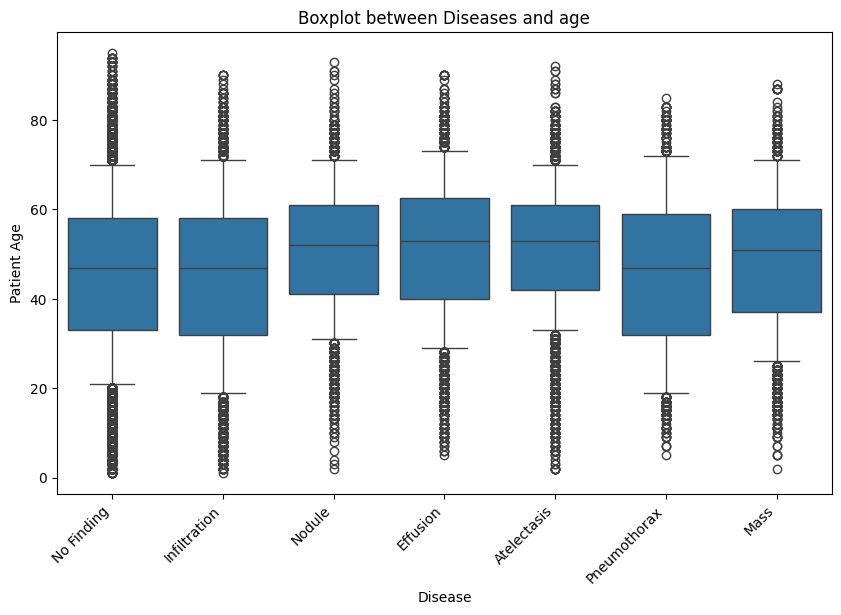

In [5]:
# create a boxplot between age and finding labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Finding Labels', y='Patient Age', data=data_df, whis=0.5)
plt.title('Boxplot between Diseases and age')
plt.xlabel('Disease')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Patient Age')
plt.show()

We can observe that even if there isn't an evident correlation between age and lung diseases, it is unlikely for some of them to happen before the age of 40.

# Viewing the correlation between sex and diseases

In [6]:
sex_disease_df = data_df[['Finding Labels', 'Patient Gender']].groupby(['Finding Labels', 'Patient Gender']).size().reset_index(name='Count')
disease_df = data_df[['Patient Gender']].groupby(['Patient Gender']).size().reset_index(name='Count_disease')
sex_disease_df = sex_disease_df.merge(disease_df, on='Patient Gender')
sex_disease_df

,Finding Labels,Patient Gender,Count,Count_disease
0,Atelectasis,F,1612,37220
1,Effusion,F,1797,37220
2,Infiltration,F,4163,37220
3,Mass,F,838,37220
4,No Finding,F,26437,37220
5,Nodule,F,1181,37220
6,Pneumothorax,F,1192,37220
7,Atelectasis,M,2603,47896
8,Effusion,M,2158,47896
9,Infiltration,M,5384,47896


In [7]:
sex_disease_df['Percentage'] = sex_disease_df['Count']/sex_disease_df['Count_disease']
sex_disease_df


,Finding Labels,Patient Gender,Count,Count_disease,Percentage
0,Atelectasis,F,1612,37220,0.043310
1,Effusion,F,1797,37220,0.048280
2,Infiltration,F,4163,37220,0.111848
3,Mass,F,838,37220,0.022515
4,No Finding,F,26437,37220,0.710290
5,Nodule,F,1181,37220,0.031730
6,Pneumothorax,F,1192,37220,0.032026
7,Atelectasis,M,2603,47896,0.054347
8,Effusion,M,2158,47896,0.045056
9,Infiltration,M,5384,47896,0.112410


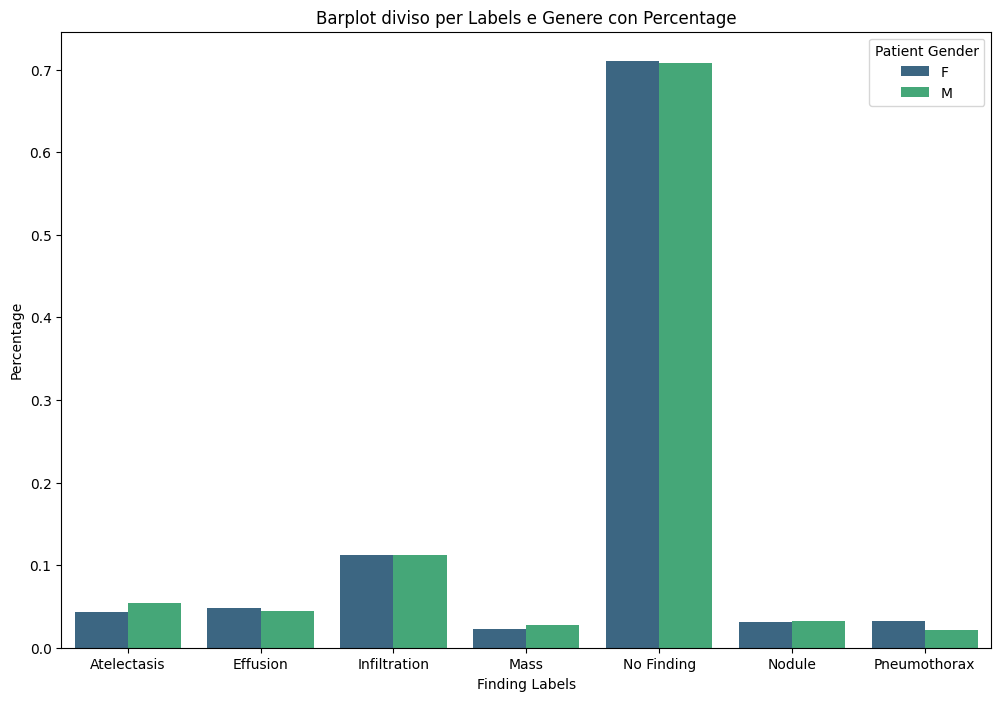

In [8]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Finding Labels', y='Percentage', hue='Patient Gender', data=sex_disease_df, palette='viridis')
plt.title('Barplot diviso per Labels e Genere con Percentage')
plt.xlabel('Finding Labels')
plt.ylabel('Percentage')
plt.show()

There doesn't seem to be a correlation between gender and lung diseases

# Visualizing random images

In this section we are going to visualize some random images from the different classes and the instensity distribution of their pixels

In [9]:
import cv2
import random 
import os 
def plot_random_image_intensity_Histogram():
    """
    Plot histogram of RGB Pixel Intensities
    """
    class_name = random.choice(['Atelectasis', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax', 'No Finding'])
    image = cv2.imread(r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Train"+ '\\' +class_name + 
                       '\\' + random.choice(os.listdir(r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Train" + '\\' + class_name)))
    plt.figure(figsize=(10,5))
    plt.subplot(2,2,1)
    plt.title(class_name)
    image_resized = cv2.resize(image, (128,128))
    image_resized = image_resized/255.0
    plt.imshow(image_resized)
    plt.axis('off')

    histo = plt.subplot(2,2,2)
    plt.title('r color distribution')
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(image_resized[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5)

    histo = plt.subplot(2,2,3)
    plt.title('g color distribution')
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(image_resized[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5)

    histo = plt.subplot(2,2,4)
    plt.title('b color distribution')
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(image_resized[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5)

    plt.subplots_adjust(hspace=0.5)
    plt.show()


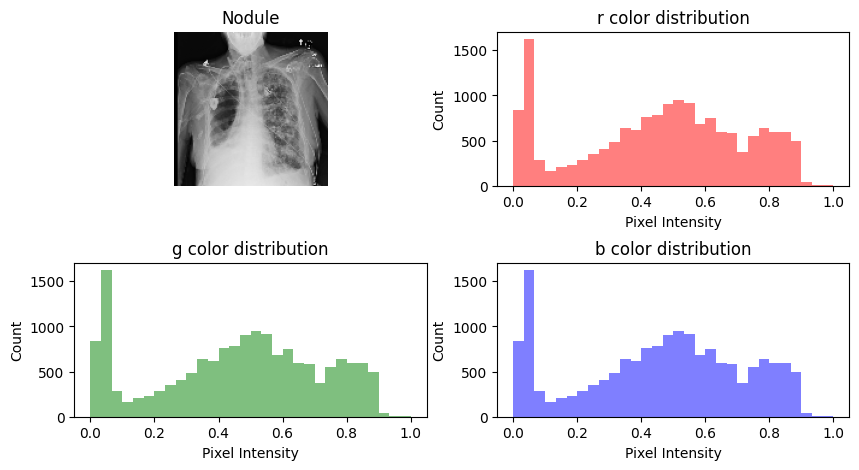

In [10]:
plot_random_image_intensity_Histogram()